In [552]:
import tensorflow as tf
import matplotlib.pyplot as plt
from scipy.fft import fft2, fftshift, ifft2, ifftshift
import numpy as np

In [573]:
def gauss_low_filter(img, D0, temp=-1, uk=0, vk=0):
    U, V = img.shape
    result = tf.zeros((U, V))
    for u in range(U):
        for v in range(V):
            D = ( (u + temp*U/2 + uk)**2 + (v + temp*V/2 + vk)**2 )**0.5
            result[u, v] = np.exp(-0.5 * D**2 / D0**2)
    return result

def clear_all(img):
    F = fft2(img)
    F_shift = fftshift(F)
    max_ = np.max((np.log(np.abs(F_shift))).ravel())
    std_ = np.std((np.log(np.abs(F_shift))).ravel())
    mean_ = np.median((np.log(np.abs(F_shift))).ravel())
    N, M = img.shape
    for i in range(N):
        for j in range(M):
            value = np.log(np.abs(F_shift[i,j]))
            if N//2-25 < i < N//2+25 and M//2-25 < j < M//2+25:
                continue
            elif (mean_ + 1.*std_) < value < (max_):
                F_shift[i,j] = 0.0
    # Inverse Fourier transform
    G = ifftshift(F_shift)
    g =  ifft2(G)

    return g, F_shift

In [574]:
car_noise = plt.imread("Hinh/car_75DPI_Moire.tif")
car_clear, G = clear_all(car_noise)

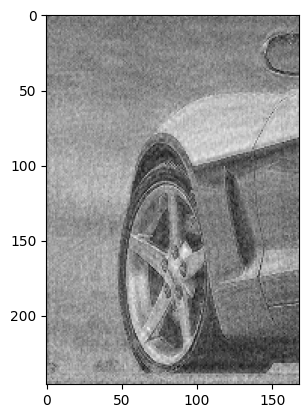

In [575]:
plt.imshow((np.abs(car_clear)), cmap='gray')

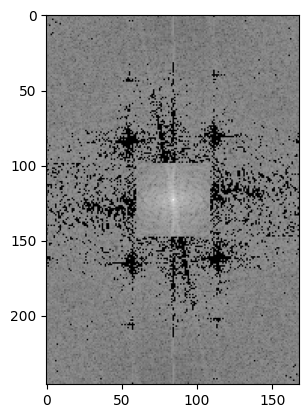

In [576]:
plt.imshow(np.log(np.abs(G)+1), cmap='gray')

In [557]:
car_clear.min()

(-1.0988117420679657-1.2768413363976879e-14j)